# Экстракция таблиц

In [7]:


import tempfile
from pdf2image import convert_from_path
import numpy as np
import os
from PIL import Image as PILImage

from table_ocr.parse_ocr_pipeline import ParseTablePipeline
def extract_tables(pdf_paths: list[str]):
    result = []
    table_ocr_pipeline = ParseTablePipeline()
    for pdf in pdf_paths:
        pdf_tables = []
        reports = []
        with tempfile.TemporaryDirectory() as td:
            images = convert_from_path(pdf)

            try:
                for idx, image in enumerate(images):
                    pix = np.array(image)
                    f_name = os.path.join(td, f'page_{idx}.jpg')
                    im = PILImage.fromarray(pix)
                    im.save(f"{f_name}")

                    extr_tables = table_ocr_pipeline(f_name)
                    pdf_tables.append(extr_tables)
                    reports.extend(table_ocr_pipeline.postprocess_tables(extr_tables))

                    if len(reports) == 4:
                        break

            except KeyboardInterrupt:
                return pdf_tables
           
    result.append(pdf_tables)
    return result

In [36]:
import cv2
def draw_table_borders_img2table(extracted_tables, pil_image):
    img_array = np.array(pil_image)
    if img_array.ndim == 2:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
    elif img_array.ndim == 3 and img_array.shape[2] == 1:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
        img_array = cv2.cvtColor(img_array.copy(), cv2.COLOR_GRAY2BGR)

    for table in extracted_tables:
        table.content.values()
        for row in table.content.values():
            for cell in row:
                cv2.rectangle(img_array, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (0, 0, 255), 2)
    
    return img_array

In [8]:
local_excel_dir = '/home/hope/Hope/Innohack/pdf_data/'
pdf_paths = [local_excel_dir + path for path in os.listdir(local_excel_dir)]
res = extract_tables(pdf_paths)
print(res)

Tables extracted: []
Tables extracted: [ExtractedTable(title=None, bbox=(183, 79, 1440, 240),shape=(3, 3))]
Tables extracted: []
Tables extracted: []
Tables extracted: []
Tables extracted: []
Tables extracted: []
Tables extracted: [ExtractedTable(title=БУХГАЛТЕРСКИЙ БАЛАНС
на 31 декабря 2023 года
коды, bbox=(193, 186, 1464, 463),shape=(10, 4)), ExtractedTable(title=None, bbox=(193, 505, 1486, 595),shape=(4, 3)), ExtractedTable(title=None, bbox=(192, 620, 1508, 1964),shape=(52, 5))]
Tables extracted: [ExtractedTable(title=ОТЧЕТ 0 ФИНАНСОВЫХ РЕЗУЛЬТАТАХ
за 2023 год, bbox=(191, 207, 1508, 1427),shape=(28, 3)), ExtractedTable(title=СПРАВОЧНО, bbox=(192, 1527, 1501, 1678),shape=(5, 4))]
Tables extracted: [ExtractedTable(title=ОТЧЕТ ОБ ИЗМЕНЕНИЯХ КАПИТАЛА
за 2023 год, bbox=(153, 300, 2146, 526),shape=(8, 4)), ExtractedTable(title=None, bbox=(152, 577, 2187, 1293),shape=(21, 8))]
Tables extracted: [ExtractedTable(title=None, bbox=(192, 108, 1501, 279),shape=(3, 4))]
Tables extracted: [Extract

In [13]:
res = res[0]

In [18]:
indx = 7

pdf = pdf_paths[0]
with tempfile.TemporaryDirectory() as td:
    images = convert_from_path(pdf)
    req_img = images[indx]


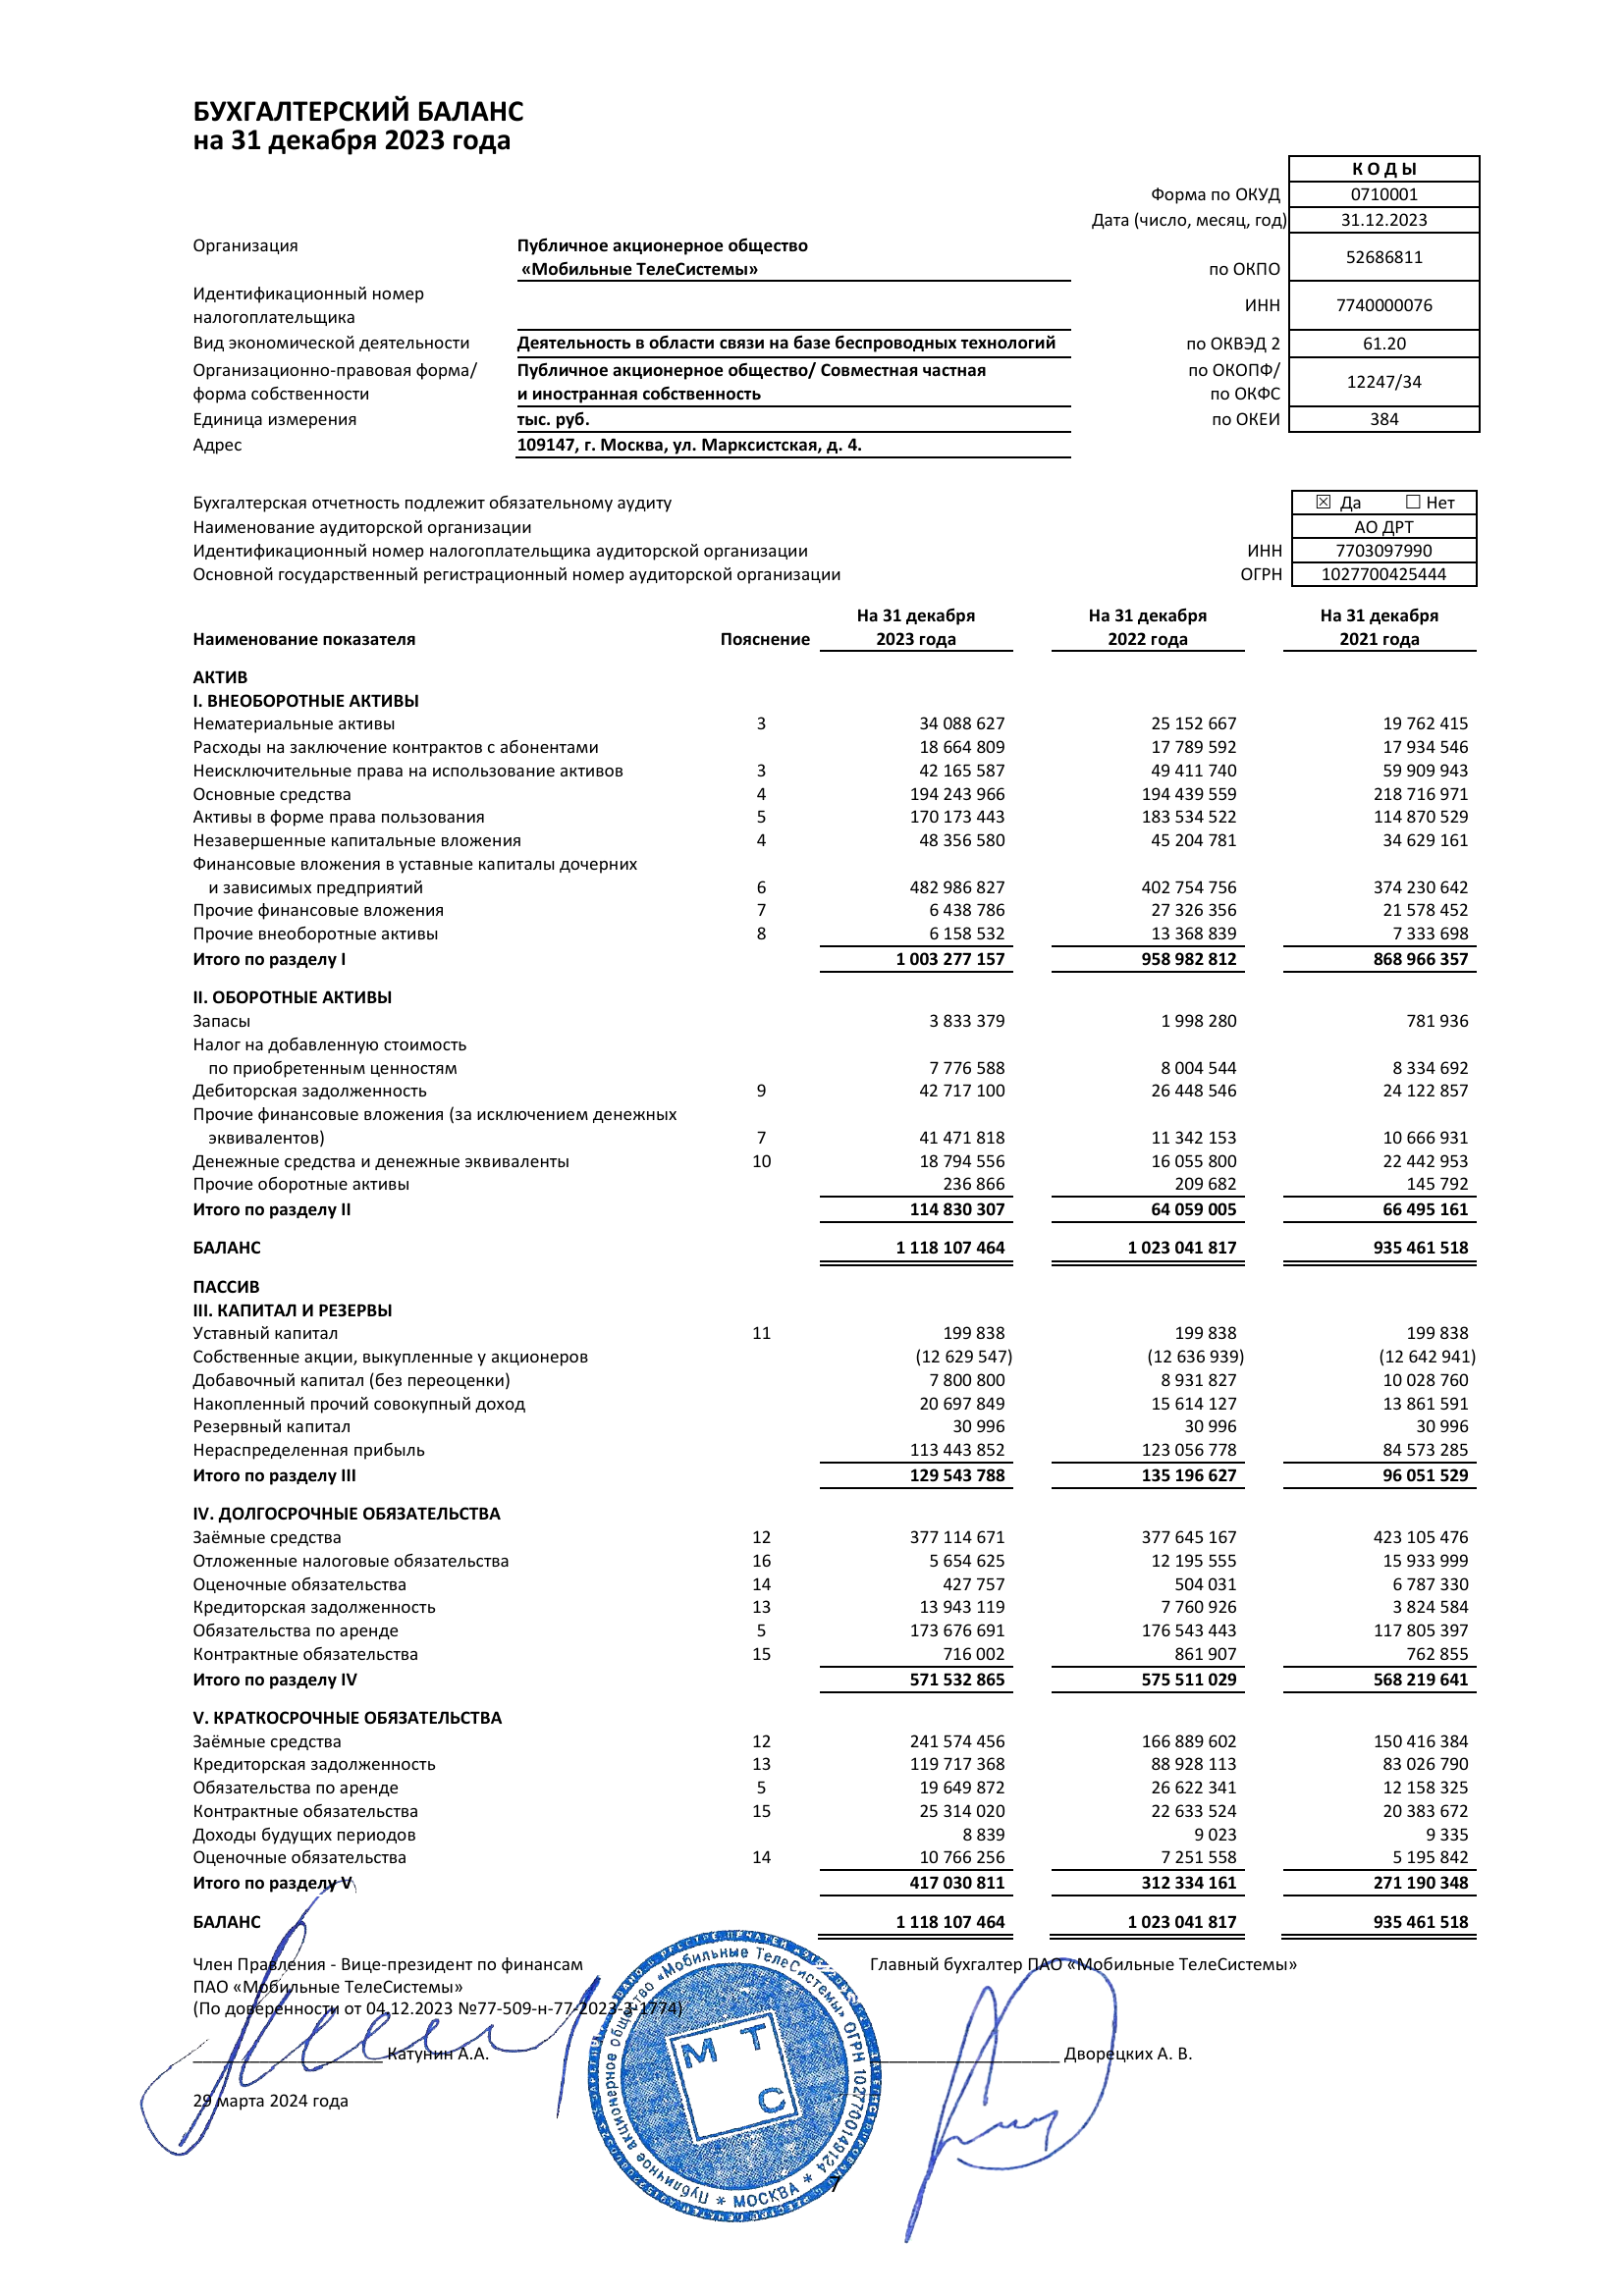

In [19]:
req_img

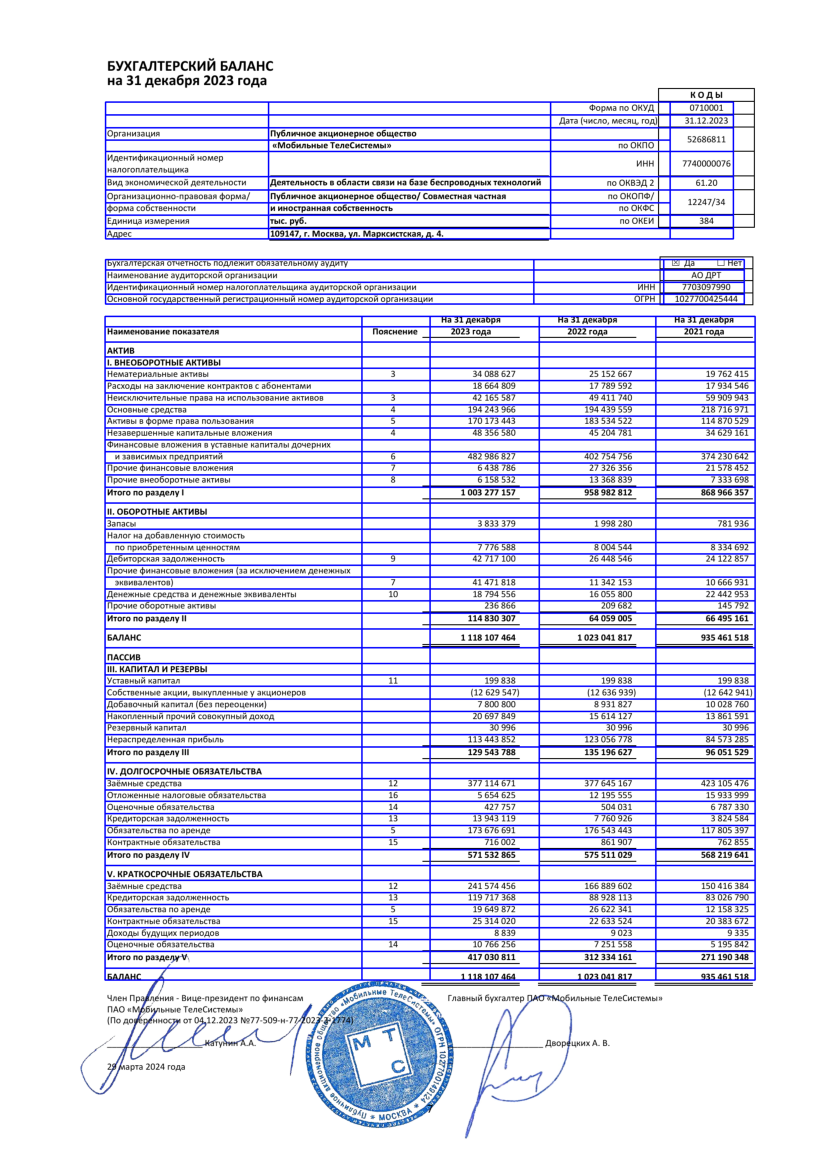

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15)) 


plt.imshow(draw_table_borders_img2table(res[indx], req_img))
plt.axis('off') 
plt.show()